In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#! pip install numpy pandas matplotlib sklearn
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc

In [ ]:
y_train = pd.read_csv("Y_train.csv")
y_valid = pd.read_csv("Y_valid.csv")
y_train.info()
X_train = pd.read_csv("aggregated_features_table_train.csv") # index_col = [0]
X_valid = pd.read_csv("aggregated_features_table_valid.csv")
X_train.info()
auc_valid = []

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16760 entries, 0 to 16759
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   mort_icu  16760 non-null  int64
dtypes: int64(1)
memory usage: 131.1 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16760 entries, 0 to 16759
Columns: 102 entries, glucose_mean to creatinine body fluid_max
dtypes: float64(102)
memory usage: 13.0 MB


In [ ]:
# 1. Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr = lr.fit(X_train, y_train)
y_valid_scores1 = lr.predict_proba(X_valid)[:, 1]
fpr1, tpr1, threshold1 = roc_curve(y_valid, y_valid_scores1)
auc_valid.append(auc(fpr1, tpr1)) 

In [ ]:
# 2. Random Forest
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(max_features='sqrt')
rfc = rfc.fit(X_train, y_train)
y_valid_scores2 = rfc.predict_proba(X_valid)[:, 1]
fpr2, tpr2, threshold2 = roc_curve(y_valid, y_valid_scores2)
auc_valid.append(auc(fpr2, tpr2)) 

In [ ]:
# 3. Adaboost
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
abc = AdaBoostClassifier()
abc=abc.fit(X_train, y_train)
y_valid_scores3 = abc.predict_proba(X_valid)[:, 1]
fpr3, tpr3, threshold3 = roc_curve(y_valid, y_valid_scores3)
auc_valid.append(auc(fpr3, tpr3)) 

In [ ]:
# 4. Gradient Boost
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()
gbc.fit(X_train,y_train)
y_valid_scores4 = gbc.predict_proba(X_valid)[:, 1]
fpr4, tpr4, threshold4 = roc_curve(y_valid, y_valid_scores4)
auc_valid.append(auc(fpr4, tpr4)) 

In [ ]:
# 5. KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
y_valid_scores5 = knn.predict_proba(X_valid)[:, 1]
fpr5, tpr5, threshold5 = roc_curve(y_valid, y_valid_scores5)
auc_valid.append(auc(fpr5, tpr5)) 

In [ ]:
# 6. SVM
from sklearn import svm  
from sklearn.svm import SVC
svm= SVC(class_weight='balanced')
svm.fit(X_train, y_train)
y_valid_scores6 = gbc.predict_proba(X_valid)[:, 1]
fpr6, tpr6, threshold6 = roc_curve(y_valid, y_valid_scores6)
auc_valid.append(auc(fpr6, tpr6)) 

In [ ]:
# 7. XG Boost
import xgboost as xgb
xg = xgb.XGBClassifier()
xg.fit(X_train, y_train)
y_valid_scores7 = gbc.predict_proba(X_valid)[:, 1]
fpr7, tpr7, threshold7 = roc_curve(y_valid, y_valid_scores7)
auc_valid.append(auc(fpr7, tpr7)) 

# **Visualization**

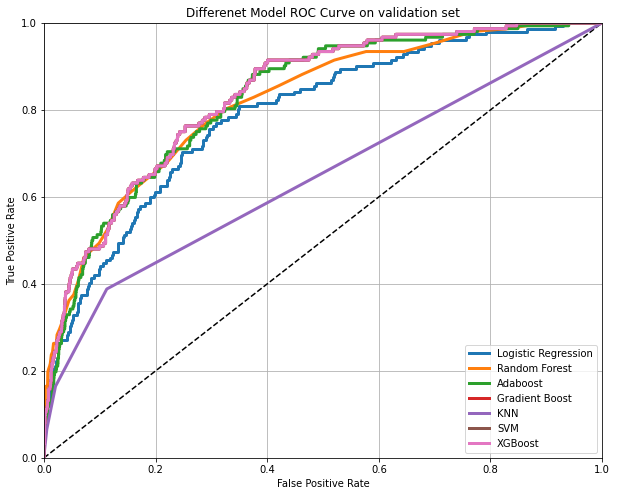

In [ ]:
plt.figure(figsize=(10,8))
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr1, tpr1, linewidth=3, label = 'Logistic Regression')
plt.plot(fpr2, tpr2, linewidth=3, label = 'Random Forest')
plt.plot(fpr3, tpr3, linewidth=3, label = 'Adaboost')
plt.plot(fpr4, tpr4, linewidth=3, label = 'Gradient Boost')
plt.plot(fpr5, tpr5, linewidth=3, label = 'KNN')
plt.plot(fpr6, tpr6, linewidth=3, label = 'SVM')
plt.plot(fpr7, tpr7, linewidth=3, label = 'XGBoost')
plt.grid()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Differenet Model ROC Curve on validation set")
plt.xlim(0,1)
plt.ylim(0,1)
plt.legend()
# plt.text(0.15, 0.9, "AUC = " + str (round (auc_valid, 4)))
plt.show()

In [ ]:
auc_valid

[0.7904625804028358,
 0.8189234236349126,
 0.8263137353866379,
 0.8344097727592845,
 0.6434280952157377,
 0.8344097727592845,
 0.8344097727592845]

In [ ]:
xg boost
Best_trial={'lambda': 0.06054818603194653, 'alpha': 0.1466008567650538, 'colsample_bytree': 0.8439300584809067, 'subsample': 0.7981800722913839, 'learning_rate': 0.05582755827248892, 'n_estimators': 2877, 'max_depth': 6, 'random_state': 498, 'min_child_weight': 12, 'objective': 'reg:logistic', 'tree_method': 'gpu_hist', 'use_label_encoder': False}


In [ ]:
# 2. Random Forest
# rfc = RandomForestClassifier(max_features='sqrt',random_state=3612, bootstrap=False, criterion='entropy')
rfc = RandomForestClassifier(max_depth=30, max_features='sqrt',random_state=3612, n_estimators=2000, min_samples_split=2, min_samples_leaf=4, bootstrap=False, criterion='entropy')
rfc = rfc.fit(X_train, y_train)
y_valid_scores2 = rfc.predict_proba(X_valid)[:, 1]
fpr2, tpr2, threshold2 = roc_curve(y_valid, y_valid_scores2)
auc_valid.append(auc(fpr2, tpr2)) 

In [ ]:
# dtc = DecisionTreeClassifier(max_depth=1, random_state=1)
# abc = AdaBoostClassifier(base_estimator=dtc, n_estimators=100, learning_rate=0.05, random_state=1)
# dtc = DecisionTreeClassifier()

In [ ]:
# knn = KNeighborsClassifier(n_neighbors=15, weights='distance', algorithm='ball_tree')  